# Forward Contracts

This notebook introduces forward payoffs and applies the forward-spot parity to different assets.

## Load Packages and Extra Functions

In [1]:
using Printf

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Present Value

With an interest rate of $y$, the present value of $Z$ paid $m$ years later is $e^{-my}Z$.

In [3]:
y  = 0.05
m  = 3/4
Z  = 100
PV = exp(-m*y)*Z

printlnPs("PV of $Z when m=$m and y=$y: ",PV)

PV of 100 when m=0.75 and y=0.05:     96.319


# Payoff of Forward Contract

Recall: the payoff of a forward contract (at expiration, $m$ periods ahead) is $S_{m}-F$

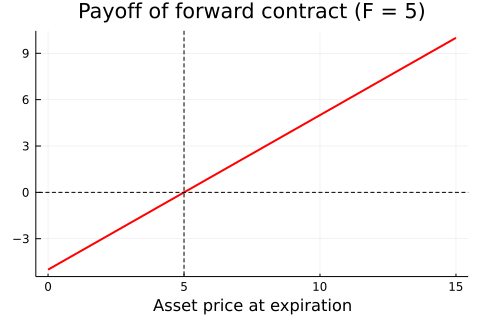

In [4]:
Sₘ = 0:15   #possible values of the underlying price at expiration
F  = 5
ForwardPayoff = Sₘ .- F

p1 = plot( Sₘ,ForwardPayoff,
           linecolor = :red,
           linewidth = 2,
           legend = false,
           title = "Payoff of forward contract (F = $F)",
           xlabel = "Asset price at expiration" )
hline!([0],linecolor=:black,line=(:dash,1))
vline!([F],linecolor=:black,line=(:dash,1))
display(p1)

# Forward-Spot Parity

Recall: for an asset without dividends (at least until expiration of the forward contract), $F=e^{my}S$

For an asset with continuous dividends at the rate $\delta$, $F=e^{m(y-\delta)}S$

In [5]:
y   = 0.05         #interest rate
m   = 3/4          #time to expiration (in years)
S   = 100          #spot price now
F_A = exp(m*y)*S   #forward price

δ   = 0.01             #dividend rate 
F_B = exp(m*(y-δ))*S   #forward price

printblue("Forward prices:")
printmat([F_A F_B],colNames=["no dividends";"with dividends"],width=16)

Forward prices:
    no dividends  with dividends
         103.821         103.045



### Forward Price of a Bond

Recall: the forward price (with expiration $m$ of the forward) of a bond that matures in $n$ is $F=e^{my(m)}B(n)$, where $y(m)$ denotes the interest for an $m$-period loan.

By definition, $1/B(m)= e^{my(m)}$. Combine to get $F=B(n)/B(m)$.

In [6]:
m  = 5              #time to expiration of forward
n  = 7              #time to maturity of bond 
ym = 0.05           #interest rates 
yn = 0.06
Bm = exp(-m*ym)     #bond price now
Bn = exp(-n*yn)
F  = Bn/Bm          #forward price a bond maturing in n, delivered in m

printblue("Bond and forward prices:")
xx = [Bm,Bn,F]
printmat(xx,colNames=["price"],rowNames=["$(m)y-bond","$(n)y-bond","$(m)y->$(n)y forward"])

Bond and forward prices:
                   price
5y-bond            0.779
7y-bond            0.657
5y->7y forward     0.844



### Covered Interest Rate Parity

The "dividend rate" on foreign currency is the foreign interest rate $y^*$ (since you can keep the foreign currency on a foreign bank account). The forward-spot parity then gives
$F=e^{m(y-y^*)}S$.

We also calculate the return on a "covered" strategy: (a) buy foreign currency (in $t=0$); (b) lend it abroad (in $t=0$); (c) enter a forward on the domestic currency (in $t=0$); (d) pay forward price and get domestic currency (in $t=m$).

In [7]:
m     = 1            #time to expiration
y     = 0.0665       #domestic interest rate
ystar = 0.05         #foreign interest rate 
S     = 1.2          #exchange rate now

F = S*exp(m*(y-ystar))

printlnPs("Forward price of foreign currency: ",F)

TradingReturn = exp(ystar)*F/S - 1
logTR         = log(TradingReturn+1)

printblue("\nReturn/rate:")
printmat([logTR,y]*100,rowNames=["covered FX strategy","domestic interest rate"])

Forward price of foreign currency:      1.220

Return/rate:
covered FX strategy        6.650
domestic interest rate     6.650

